<a href="https://colab.research.google.com/github/skywalker0803r/works/blob/master/%E5%8D%97%E4%BA%9EPA%E5%BB%A0R3_%E9%A0%90%E6%B8%AC%E5%96%AE%E8%80%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
path = '/content/drive/My Drive/南亞PA廠/PA_201605-201906更新R3.xlsx'
df = pd.read_excel(path,index_col=0,parse_dates = True)
print(df.shape)
df.head()

(55056, 67)


,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B04,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,MLPAP_TI-0706B12,MLPAP_TI-0706B13,MLPAP_TI-0706B14,MLPAP_TI-0706B15,MLPAP_TI-0706B16,MLPAP_TI-0706B17,MLPAP_TI-0706B18,MLPAP_TI-0706B19,MLPAP_TI-0706B20,MLPAP_TI-0706B21,MLPAP_TI-0706B22,MLPAP_TI-0706B23,MLPAP_TI-0706B24,MLPAP_TJR-0715A1.PV,MLPAP_TJR-0715A2.PV,MLPAP_TJR-0715B1.PV,MLPAP_TJR-0715B2.PV,MLPAP_TJR-0720A1.PV,MLPAP_TJR-0720A2.PV,MLPAP_TJR-0720B1.PV,MLPAP_TJR-0720B2.PV,MLPAP_TJR-0762A1.PV,MLPAP_TJR-0762A2.PV,MLPAP_TJR-0762B1.PV,MLPAP_TJR-0762B2.PV,MLPAP_TI-0706A02,MLPAP_TI-0706B01,MLPAP_TI-0706C01,MLPAP_TI-0706D01,MLPAP_TI-0716B01,MLPAP_TI-0716C01,MLPAP_TI-0716D01,MLPAP_TI-0716E01,MLPAP_TI-0716A01,MLPAP_TI-0706E01,MLPAP_TI-0706A01,MLPAP_TI-0716D02,MLPAP_TJC-0627.PV,MLPAP_TRC-0610.PV,MLPAP_FR-0632.PV,MLPAP_FQ-0619.PV,MLPAP_TIC-0757A.PV,MLPAP_PIC-0741.PV,MLPAP_LIC-0738.PV,MLPAP_PIC-0761.PV,MLPAP_TRC-0762.PV,MLPAP_LRC-0729.PV,MLPAP_TIC-1721.PV,MLPAP_TRC-1734.PV,MLPAP_TJR-0721.PV,MLPAP_FQI-0997.PV,DATA OF USE,MLPAP_FR-0755.PV,MLPAP_FR-0791.PV,MLPAP_FI-V211.PV,MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV
2016-05-09 00:00:00,400,402,401,402,401,401,400,403,402,401,401,401,403,400,402,402,401,403,401,399,401,401,402,402.8,401.3,399.8,0,402.5,82.7,401.9,400.9,402.1,0,0,561.3,400,402,400,400,399,402,400,399,401,401,401,400,31,200.6,0,0,399.7,No Data,5.26359,46.9,401.317,0,62.303,182.366,236.267,0,0.02083,4.04999,6.46654,No Data,-1,1.6
2016-05-09 00:30:00,400,402,401,402,401,401,400,403,402,401,401,401,403,400,402,402,401,403,401,399,401,401,402,402.9,401.2,399.8,0,402.5,0,402,401,402,0,0,561.1,400,402,400,400,400,401,400,399.344,401,401,400,400.827,30.8,201.8,0,0,399.8,No Data,5.32343,46.9,401.2,0,62.1,173.7,236.533,0,0.04166,4.05444,6.53617,No Data,-0.656621,1.6
2016-05-09 01:00:00,400,402,401,403,401,401,401,403,402,401,401,401,403,401,402,402,401,403,401,399,402,401,402,402.7,401.2,399.8,0,402.4,82.4,402,401,402.1,0,0,561.2,400,402,400,400,400,402,400,399.66,401,401,400,400.171,30.6,202.6,0,0,399.8,No Data,5.3067,46.9,401.2,0,62.2661,182.767,236.867,0,0.06249,4.09347,6.50804,No Data,-0.339357,1.7
2016-05-09 01:30:00,400,402,401,403,401,401,401,403,402,401,401,401,404,400,403,402,402,403,401,399,401,401,402,403.3,401.6,399.8,0,402.7,0,401.9,401.1,402.1,0,0,561.3,401,403,400,400,400,402,401,399.341,401,401,400.33,400,30.4,203.083,0,0,399.9,No Data,5.3367,46.9,401.617,0,63.3579,174.399,235.833,0,0.08332,4.08985,6.42564,No Data,-1,1.7
2016-05-09 02:00:00,400,401,400,402,401,401,400,403,402,401,400,401,403,400,402,401,401,403,401,398,401,401,402,402.2,400.9,399.4,0,402.2,0,401.7,400.7,401.9,0,0,561.1,400,402,400,400,399,401,400,399,400,401,400,400,30.266,203.3,0,0,399.6,No Data,5.2234,46.9171,400.9,0,62.4,182.666,234.967,0,0.10415,4.0566,6.53658,No Data,-1,1.8


# columns dtypes Transform

In [3]:
for c in df.columns:
  df[c] = pd.to_numeric(df[c],errors='coerce')
df.dtypes

MLPAP_TI-0706B02         int64
MLPAP_TI-0706B03       float64
MLPAP_TI-0706B04       float64
MLPAP_TI-0706B05       float64
MLPAP_TI-0706B06       float64
MLPAP_TI-0706B07       float64
MLPAP_TI-0706B08       float64
MLPAP_TI-0706B09       float64
MLPAP_TI-0706B10       float64
MLPAP_TI-0706B11       float64
MLPAP_TI-0706B12       float64
MLPAP_TI-0706B13       float64
MLPAP_TI-0706B14       float64
MLPAP_TI-0706B15       float64
MLPAP_TI-0706B16       float64
MLPAP_TI-0706B17       float64
MLPAP_TI-0706B18       float64
MLPAP_TI-0706B19       float64
MLPAP_TI-0706B20       float64
MLPAP_TI-0706B21       float64
MLPAP_TI-0706B22       float64
MLPAP_TI-0706B23       float64
MLPAP_TI-0706B24       float64
MLPAP_TJR-0715A1.PV    float64
MLPAP_TJR-0715A2.PV    float64
MLPAP_TJR-0715B1.PV    float64
MLPAP_TJR-0715B2.PV    float64
MLPAP_TJR-0720A1.PV    float64
MLPAP_TJR-0720A2.PV    float64
MLPAP_TJR-0720B1.PV    float64
                        ...   
MLPAP_TI-0706C01       float64
MLPAP_TI

# miss value check

In [4]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
MISS_TABLE = missing_values_table(df)
MISS_TABLE.head(10)

Your selected dataframe has 67 columns.
There are 65 columns that have missing values.


,Missing Values,% of Total Values
MLPAP_PIC-0741.PV,43911,79.8
MLPAP_FI-V211.PV,39213,71.2
MLPAP_FQ-0619.PV,456,0.8
MLPAP_FR-0632.PV,456,0.8
MLPAP_FQI-0997.PV,456,0.8
MLPAP_FR-0755.PV,456,0.8
MLPAP_TI-0706B01,422,0.8
MLPAP_TI-0706B11,422,0.8
MLPAP_TI-0706B16,422,0.8
MLPAP_TI-0706B06,422,0.8


In [5]:
print(df.shape)
兩個高缺失值欄位 = df[['MLPAP_PIC-0741.PV','MLPAP_FI-V211.PV']]
df = df.drop(['MLPAP_PIC-0741.PV','MLPAP_FI-V211.PV'],axis=1)
df = df.dropna(axis=0)
df = df.join(兩個高缺失值欄位)
print(df.shape)

(55056, 67)
(54506, 67)


# 定義Y值合理範圍0~10000

count    45591.000000
mean      8019.713578
std        916.040394
min         35.769997
25%       7967.000000
50%       8275.633789
75%       8484.603516
max       9995.000000
Name: MLPAP_FQI-0997.PV, dtype: float64


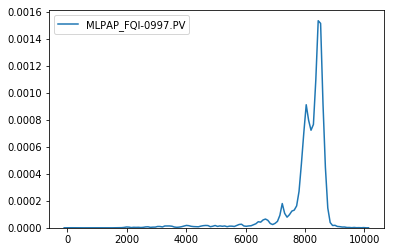

In [6]:
import seaborn as sns
y_name = 'MLPAP_FQI-0997.PV'#粗PA出料量
SPEC_MAX = 10000
SPEC_MIN = 0
condition = (SPEC_MIN<df[y_name])&(df[y_name]<SPEC_MAX)
print(df[condition][y_name].describe())
sns.kdeplot(df[condition][y_name])

# 根據Y值在SPEC內的部份來篩選資料

In [7]:
print(df.shape)
df = df[condition]
print(df.shape)

(54506, 67)
(45591, 67)


# 業主表示'MLPAP_TRC-0762.PV'有到365以上都是壞掉

In [8]:
print(df.shape)
condition = (df['MLPAP_TRC-0762.PV'] < 365)
df = df[condition]
print(df.shape)

(45591, 67)
(44680, 67)


# 其他溫度欄位SPEC是340到450

In [9]:
#找尋溫度欄位
T_columns = [] 
for c in list(df.columns):
  m = df[c].mean()
  if(340<m)&(m<450):
    print('欄位:{}均值:{}'.format(c,m))
    T_columns.append(c)
T_columns

欄位:MLPAP_TI-0706B02均值:400.0
欄位:MLPAP_TI-0706B03均值:397.52517905102957
欄位:MLPAP_TI-0706B04均值:402.21072068039393
欄位:MLPAP_TI-0706B05均值:407.70931065353625
欄位:MLPAP_TI-0706B06均值:403.0975380483438
欄位:MLPAP_TI-0706B07均值:403.08113249776187
欄位:MLPAP_TI-0706B08均值:401.59514324082363
欄位:MLPAP_TI-0706B09均值:401.2958146821844
欄位:MLPAP_TI-0706B10均值:398.1996866606983
欄位:MLPAP_TI-0706B11均值:392.79693375111907
欄位:MLPAP_TI-0706B12均值:388.1617278424351
欄位:MLPAP_TI-0706B13均值:385.7139883616831
欄位:MLPAP_TI-0706B14均值:391.6541629364369
欄位:MLPAP_TI-0706B16均值:389.33272157564903
欄位:MLPAP_TI-0706B17均值:384.8984333034915
欄位:MLPAP_TI-0706B18均值:380.05179051029546
欄位:MLPAP_TI-0706B19均值:376.91978513876455
欄位:MLPAP_TI-0706B20均值:371.84066696508506
欄位:MLPAP_TI-0706B21均值:375.9692703670546
欄位:MLPAP_TI-0706B22均值:379.330102954342
欄位:MLPAP_TI-0706B23均值:375.950872873769
欄位:MLPAP_TI-0706B24均值:371.84321844225605
欄位:MLPAP_TJR-0715A1.PV均值:358.3852500205181
欄位:MLPAP_TJR-0715B1.PV均值:355.7720927444226
欄位:MLPAP_TJR-0720B1.PV均值:344.80242399

['MLPAP_TI-0706B02',
 'MLPAP_TI-0706B03',
 'MLPAP_TI-0706B04',
 'MLPAP_TI-0706B05',
 'MLPAP_TI-0706B06',
 'MLPAP_TI-0706B07',
 'MLPAP_TI-0706B08',
 'MLPAP_TI-0706B09',
 'MLPAP_TI-0706B10',
 'MLPAP_TI-0706B11',
 'MLPAP_TI-0706B12',
 'MLPAP_TI-0706B13',
 'MLPAP_TI-0706B14',
 'MLPAP_TI-0706B16',
 'MLPAP_TI-0706B17',
 'MLPAP_TI-0706B18',
 'MLPAP_TI-0706B19',
 'MLPAP_TI-0706B20',
 'MLPAP_TI-0706B21',
 'MLPAP_TI-0706B22',
 'MLPAP_TI-0706B23',
 'MLPAP_TI-0706B24',
 'MLPAP_TJR-0715A1.PV',
 'MLPAP_TJR-0715B1.PV',
 'MLPAP_TJR-0720B1.PV',
 'MLPAP_TI-0706A02',
 'MLPAP_TI-0706C01',
 'MLPAP_TI-0706D01',
 'MLPAP_TI-0716B01',
 'MLPAP_TI-0716C01',
 'MLPAP_TI-0716D01',
 'MLPAP_TI-0716E01',
 'MLPAP_TI-0716A01',
 'MLPAP_TI-0706E01',
 'MLPAP_TI-0706A01',
 'MLPAP_TI-0716D02',
 'MLPAP_TIC-0757A.PV',
 'MLPAP_TRC-0762.PV',
 'MLPAP_TJR-0721.PV']

In [10]:
print(df.shape)
for c in T_columns:
  condition = (340<df[c])&(df[c]<450)
  df = df[condition]
print(df.shape)

(44680, 67)
(37638, 67)


# 新增單耗

In [11]:
df['單耗'] = df['MLPAP_FQ-0619.PV']/df['MLPAP_FQI-0997.PV']
print(df.shape)
df.head()

(37638, 68)


,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B04,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,MLPAP_TI-0706B12,MLPAP_TI-0706B13,MLPAP_TI-0706B14,MLPAP_TI-0706B15,MLPAP_TI-0706B16,MLPAP_TI-0706B17,MLPAP_TI-0706B18,MLPAP_TI-0706B19,MLPAP_TI-0706B20,MLPAP_TI-0706B21,MLPAP_TI-0706B22,MLPAP_TI-0706B23,MLPAP_TI-0706B24,MLPAP_TJR-0715A1.PV,MLPAP_TJR-0715A2.PV,MLPAP_TJR-0715B1.PV,MLPAP_TJR-0715B2.PV,MLPAP_TJR-0720A1.PV,MLPAP_TJR-0720A2.PV,MLPAP_TJR-0720B1.PV,MLPAP_TJR-0720B2.PV,MLPAP_TJR-0762A1.PV,MLPAP_TJR-0762A2.PV,MLPAP_TJR-0762B1.PV,MLPAP_TJR-0762B2.PV,MLPAP_TI-0706A02,MLPAP_TI-0706B01,MLPAP_TI-0706C01,MLPAP_TI-0706D01,MLPAP_TI-0716B01,MLPAP_TI-0716C01,MLPAP_TI-0716D01,MLPAP_TI-0716E01,MLPAP_TI-0716A01,MLPAP_TI-0706E01,MLPAP_TI-0706A01,MLPAP_TI-0716D02,MLPAP_TJC-0627.PV,MLPAP_TRC-0610.PV,MLPAP_FR-0632.PV,MLPAP_FQ-0619.PV,MLPAP_TIC-0757A.PV,MLPAP_LIC-0738.PV,MLPAP_PIC-0761.PV,MLPAP_TRC-0762.PV,MLPAP_LRC-0729.PV,MLPAP_TIC-1721.PV,MLPAP_TRC-1734.PV,MLPAP_TJR-0721.PV,MLPAP_FQI-0997.PV,DATA OF USE,MLPAP_FR-0755.PV,MLPAP_FR-0791.PV,MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_PIC-0741.PV,MLPAP_FI-V211.PV,單耗
2016-05-14 16:00:00,400,361.0,360.0,362.0,361.0,361.0,360.0,362.0,361.0,360.0,360.0,360.0,363.0,360.0,362.0,361.0,361.0,362.0,360.0,359.0,361.0,361.0,362.0,362.399994,361.299988,359.100006,0.0,361.799988,81.199997,361.399994,360.500000,361.299988,0.0,0.0,561.099976,359.0,362.0,359.0,359.0,358.0,361.0,359.0,359.00000,360.0,359.607605,359.000000,360.0,125.312370,163.811005,0.000000,0.000000,357.399994,45.443474,48.588989,361.288971,0.000000,61.900002,181.600006,340.695618,2412.330322,5.68659,4.254586,6.514494,0.000000,1.221908,NaN,NaN,0.000000
2016-05-31 12:30:00,400,424.0,429.0,433.0,421.0,415.0,402.0,391.0,382.0,377.0,374.0,373.0,377.0,375.0,376.0,375.0,374.0,374.0,372.0,377.0,381.0,379.0,379.0,367.600006,364.799988,366.899994,0.0,367.399994,80.099998,365.799988,366.500000,365.200012,0.0,0.0,538.099976,389.0,371.0,415.0,380.0,420.0,374.0,375.0,426.59201,383.0,377.000000,372.000000,378.0,144.877609,184.080307,85.589172,5591.000000,361.200012,36.229343,49.400002,364.799988,32.367184,63.959202,183.237366,357.299988,6113.333008,22.53806,6.645554,27.073322,480.631927,1.940798,NaN,NaN,0.914558
2016-05-31 13:00:00,400,424.0,429.0,433.0,421.0,415.0,402.0,391.0,382.0,377.0,374.0,373.0,377.0,375.0,376.0,375.0,374.0,374.0,372.0,377.0,381.0,380.0,379.0,367.399994,364.600006,367.299988,0.0,367.200012,81.199997,366.000000,366.600006,365.299988,0.0,0.0,534.400024,389.0,371.0,415.0,380.0,420.0,374.0,375.0,426.40860,383.0,377.000000,372.184662,378.0,144.859131,184.899994,85.430405,5581.961426,361.200012,35.772163,49.400002,364.600006,34.932251,64.022583,183.826126,357.399994,6195.116211,22.55889,6.960387,27.760000,480.225830,2.200000,NaN,NaN,0.901026
2016-05-31 13:30:00,400,425.0,430.0,434.0,421.0,415.0,402.0,391.0,382.0,377.0,374.0,373.0,377.0,374.0,376.0,374.0,373.0,374.0,372.0,377.0,381.0,379.0,379.0,366.899994,364.899994,367.200012,0.0,367.100006,76.000000,365.700012,366.399994,365.000000,0.0,0.0,529.799988,388.0,371.0,415.0,380.0,420.0,374.0,375.0,427.00000,383.0,376.000000,372.000000,378.0,144.922607,184.690247,85.561195,5607.145996,361.159149,36.901550,49.400002,364.899994,36.599998,63.345219,183.426193,357.299988,6154.651367,22.57972,6.815050,27.426043,484.591309,2.200000,NaN,NaN,0.911042
2016-05-31 15:30:00,400,424.0,429.0,434.0,422.0,415.0,402.0,391.0,382.0,377.0,374.0,373.0,377.0,374.0,376.0,375.0,373.0,374.0,372.0,377.0,381.0,379.0,379.0,367.600006,364.899994,365.799988,0.0,367.000000,81.099998,365.799988,366.299988,365.100006,0.0,0.0,520.500000,389.0,372.0,414.0,381.0,420.0,374.0,375.0,426.00000,383.0,377.000000,372.812744,378.0,145.399994,182.819885,85.721992,5628.302246,361.000000,35.795021,49.400002,364.899994,36.829994,61.918571,180.631454,357.181274,6198.586914,22.66304,7.076089,27.719660,482.035736,2.059285,NaN,NaN,0.907998


count    37638.000000
mean         0.913885
std          1.046591
min          0.000000
25%          0.898339
50%          0.906235
75%          0.914733
max        203.772903
Name: 單耗, dtype: float64


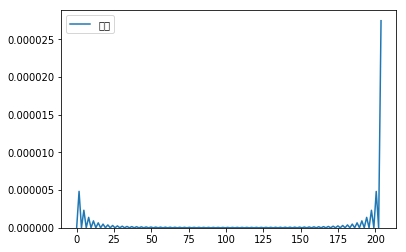

In [12]:
sns.kdeplot(df['單耗'])
print(df['單耗'].describe())

# 業主表示單耗範圍應該再0~2之間

(37638, 68)
(37618, 68)
count    37618.000000
mean         0.908235
std          0.032245
min          0.129275
25%          0.898340
50%          0.906233
75%          0.914721
max          1.909898
Name: 單耗, dtype: float64


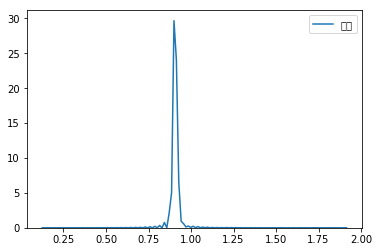

In [13]:
print(df.shape)
condition = (df['單耗']>0)&(df['單耗']<=2)
df = df[condition]
print(df.shape)
sns.kdeplot(df['單耗'])
print(df['單耗'].describe())

# 刪除粗PA出料量(預測單耗不能用到這個欄位)

In [14]:
df = df.drop('MLPAP_FQI-0997.PV',axis=1)
df.shape

(37618, 67)

# 刪除後來才加裝的兩個(因為後來才加裝欄位缺失太多)

In [15]:
df = df.dropna(axis=1)
df.shape

(37618, 65)

# train test切分

In [16]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df ,test_size=0.1, random_state=42)
print(df_train.shape,df_test.shape)

(33856, 65) (3762, 65)


# StandardScaler

In [0]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df_train)

df_train_ss = ss.transform(df_train)
df_test_ss = ss.transform(df_test)

df_train_ss = pd.DataFrame(df_train_ss,index = df_train.index,columns = df_train.columns)
df_test_ss =  pd.DataFrame(df_test_ss,index = df_test.index,columns = df_test.columns)

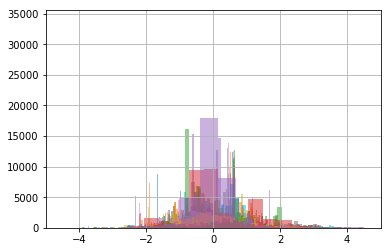

In [18]:
import matplotlib.pyplot as plt
for c in df_train_ss.columns:
  df_train_ss[c].hist(bins=100,alpha=0.5)
plt.xlim(-5,5)
plt.show()

# y不用scaling

In [0]:
y_name = '單耗'
df_train_ss[y_name] = df_train[y_name]
df_test_ss[y_name] = df_test[y_name]

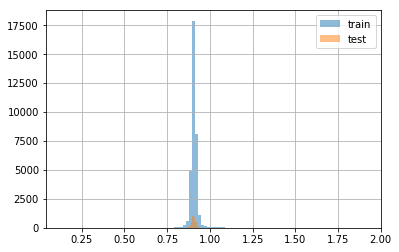

In [20]:
df_train_ss[y_name].hist(bins=100,alpha=0.5,label='train')
df_test_ss[y_name].hist(bins=100,alpha=0.5,label='test')
plt.legend()
plt.show()

# 建模資料準備

In [0]:
X_train = df_train_ss.drop(y_name,axis=1)
y_train = df_train_ss[y_name]
X_test = df_test_ss.drop(y_name,axis=1)
y_test = df_test_ss[y_name]

# 評估function

In [0]:
import numpy as np
def rmse(y_test,y_pred):
    return np.sqrt(((y_pred - y_test) ** 2).mean())
def mape(y_true, y_pred):   
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape

# 中英對照表

In [23]:
tag盤點表 = pd.read_excel('/content/drive/My Drive/南亞PA廠/tag盤點表_新.xlsx')
tag盤點表.head()

,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
0,1,MLPAP_TJC-0627.PV,OX預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,140,160,***
1,2,MLPAP_TRC-0610.PV,空氣預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,160,200,***
2,3,MLPAP_FR-0632.PV,汽機風量,流量,KNM3/HR,可控制因子,1分鐘2筆,30,90,****
3,4,MLPAP_FQ-0619.PV,OX入料量,流量,kg/HR,可控制因子,1分鐘2筆,2000,8000,****
4,5,MLPAP_TIC-0757A.PV,反應槽鹽浴溫度,溫度,℃,可控制因子,1分鐘2筆,345,365,****


# ridge建模

In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
rr = Ridge(alpha=1.0)#默認值 
rr.fit(X_train, y_train)
y_pred = pd.Series(rr.predict(X_test),index=y_test.index,name='y_pred')

R2 = r2_score(y_test,y_pred)
RMSE = rmse(y_test,y_pred)
MAPE = mape(y_test,y_pred)
print('R2:{}\nRMSE:{}\nMAPE:{}'.format(R2,RMSE,MAPE))

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
result = pd.DataFrame(dict(zip(X_train.columns,rr.coef_)),index=['coef']).T.sort_values(by='coef',ascending=False)
result['chinese'] = result.index.map(dict(zip(tag盤點表['TAG'],tag盤點表['chinese'])))
result = result[['chinese','coef']]
result

R2:0.205447193025732
RMSE:0.024010662092282458
MAPE:1.253920998319538


,chinese,coef
MLPAP_FQ-0619.PV,OX入料量,0.043749
MLPAP_TIC-0757A.PV,反應槽鹽浴溫度,0.017694
MLPAP_TJR-0715A1.PV,鹽浴溫度,0.015436
MLPAP_TJR-0720B1.PV,鹽浴溫度,0.014033
MLPAP_TI-0716D02,反應槽觸媒溫度(CL2)_高度(2380),0.011299
MLPAP_FR-0755.PV,反應槽16K蒸氣輸出,0.011230
MLPAP_TJR-0721.PV,反應槽出口溫度,0.009654
MLPAP_TJR-0715B2.PV,鹽浴溫度,0.009172
MLPAP_TI-0706B08,反應槽溫度_多點式(高度 850),0.008572
MLPAP_TI-0716C01,反應槽觸媒溫度_高度(2715),0.008279


# ridge預測評估

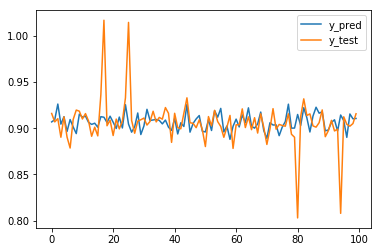

In [25]:
y_pred = rr.predict(X_test)
plt.plot(y_pred[:100],label='y_pred')
plt.plot(y_test.values[:100],label='y_test')
plt.legend()
plt.show()

# Lasso建模

In [26]:
from sklearn.linear_model import Lasso
la = Lasso(1.0)#默認值 
la.fit(X_train, y_train)
y_pred = pd.Series(la.predict(X_test),index=y_test.index,name='y_pred')

R2 = r2_score(y_test,y_pred)
RMSE = rmse(y_test,y_pred)
MAPE = mape(y_test,y_pred)
print('R2:{}\nRMSE:{}\nMAPE:{}'.format(R2,RMSE,MAPE))

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
result = pd.DataFrame(dict(zip(X_train.columns,la.coef_)),index=['coef']).T.sort_values(by='coef',ascending=False)
result['chinese'] = result.index.map(dict(zip(tag盤點表['TAG'],tag盤點表['chinese'])))
result = result[['chinese','coef']]
result

R2:-2.3221154370922648e-05
RMSE:0.02693691123059686
MAPE:1.402389634279306


,chinese,coef
MLPAP_TI-0706B02,反應槽溫度_多點式(高度 250),0.0
MLPAP_TI-0706B03,反應槽溫度_多點式(高度 350),-0.0
MLPAP_TJR-0762B2.PV,鹽浴溫度,-0.0
MLPAP_TI-0706A02,反應槽觸媒溫度_高度(1010),-0.0
MLPAP_TI-0706B01,反應槽觸媒溫度_高度(2865),-0.0
MLPAP_TI-0706C01,反應槽觸媒溫度_高度(400),-0.0
MLPAP_TI-0706D01,反應槽觸媒溫度_高度(2230),0.0
MLPAP_TI-0716B01,反應槽觸媒溫度_高度(700),-0.0
MLPAP_TI-0716C01,反應槽觸媒溫度_高度(2715),0.0
MLPAP_TI-0716D01,反應槽觸媒溫度_高度(1650),-0.0


# 篩選溫度欄位

In [51]:
ind = []
for i in result.index:
  data = result.loc[i,:]
  if '高度' in data['chinese']:
    ind.append(i)
溫度欄位 = result.loc[ind,:].index.tolist()
print(len(溫度欄位))
result.loc[ind,:].head()

35


,chinese,feature_importances
MLPAP_TI-0706B09,反應槽溫度_多點式(高度 950),0.090700
MLPAP_TI-0706E01,反應槽觸媒溫度(CL1)_高度(1310),0.075550
MLPAP_TI-0716D01,反應槽觸媒溫度_高度(1650),0.031351
MLPAP_TI-0706B10,反應槽溫度_多點式(高度 1050),0.029716
MLPAP_TI-0706B01,反應槽觸媒溫度_高度(2865),0.029335


# Lasso預測評估

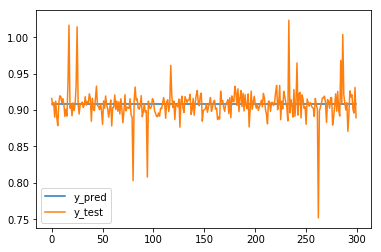

In [52]:
y_pred = la.predict(X_test)
plt.plot(y_pred[:300],label='y_pred')
plt.plot(y_test.values[:300],label='y_test')
plt.legend()
plt.show()

# xgboost建模

In [53]:
from xgboost import XGBRegressor
xgb = XGBRegressor() 
xgb.fit(X_train, y_train)
y_pred = pd.Series(xgb.predict(X_test),index=y_test.index,name='y_pred')

R2 = r2_score(y_test,y_pred)
RMSE = rmse(y_test,y_pred)
MAPE = mape(y_test,y_pred)
print('R2:{}\nRMSE:{}\nMAPE:{}'.format(R2,RMSE,MAPE))

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
result = pd.DataFrame(dict(zip(X_train.columns,xgb.feature_importances_)),index=['feature_importances']).T.sort_values(by='feature_importances',ascending=False)
result['chinese'] = result.index.map(dict(zip(tag盤點表['TAG'],tag盤點表['chinese'])))
result = result[['chinese','feature_importances']]
result

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[06:21:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2:0.44594614590500703
RMSE:0.020050201560866593
MAPE:1.1404995926351158


,chinese,feature_importances
MLPAP_TI-0706B09,反應槽溫度_多點式(高度 950),0.090700
MLPAP_FQ-0619.PV,OX入料量,0.088028
MLPAP_TI-0706E01,反應槽觸媒溫度(CL1)_高度(1310),0.075550
MLPAP_TJR-0762A1.PV,鹽浴溫度,0.036625
MLPAP_TI-0716D01,反應槽觸媒溫度_高度(1650),0.031351
MLPAP_TI-0706B10,反應槽溫度_多點式(高度 1050),0.029716
MLPAP_TI-0706B01,反應槽觸媒溫度_高度(2865),0.029335
MLPAP_PI-0658.PV,反應器入口壓力,0.027043
MLPAP_TJR-0762B2.PV,鹽浴溫度,0.024584
MLPAP_TRC-1734.PV,轉換式冷凝器熱油溫度,0.024514


# xgboost預測評估

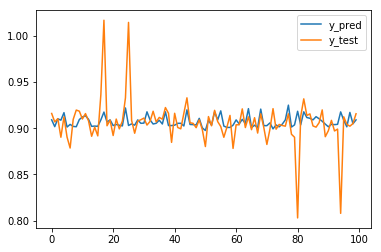

In [54]:
y_pred = xgb.predict(X_test)
plt.plot(y_pred[:100],label='y_pred')
plt.plot(y_test.values[:100],label='y_test')
plt.legend()
plt.show()

# 檢查取樣頻率

In [55]:
取樣頻率 = []
for index ,index_new in zip( df.index ,df.index[1:]):
  取樣頻率.append(index_new - index)
print(len(取樣頻率))
pd.Series(取樣頻率).value_counts()

37617


0 days 00:30:00      37550
0 days 01:00:00         26
0 days 01:30:00          5
0 days 02:00:00          4
0 days 02:30:00          3
0 days 03:00:00          2
0 days 13:30:00          2
1 days 00:00:00          2
0 days 13:00:00          1
1 days 16:00:00          1
89 days 17:30:00         1
0 days 09:30:00          1
0 days 22:30:00          1
9 days 10:00:00          1
0 days 05:00:00          1
0 days 11:30:00          1
0 days 14:30:00          1
0 days 10:00:00          1
0 days 07:00:00          1
1 days 08:30:00          1
14 days 14:00:00         1
7 days 05:30:00          1
1 days 00:30:00          1
0 days 04:00:00          1
0 days 18:30:00          1
0 days 12:00:00          1
0 days 20:00:00          1
147 days 03:30:00        1
48 days 06:00:00         1
0 days 15:30:00          1
9 days 13:30:00          1
dtype: int64

# 由於正常取樣頻率為30分鐘 也就是index應該間隔30分

In [67]:
import datetime

觀察時間們 = []
觀察時間 = []
'''
解決方法:只選取連續時間段
觀察時間們 = ['觀察時間1(連續)','觀察時間2(連續)','觀察時間3(連續)']
'''

for i,i_next in zip(df.index,df.index[1:]):
  #若跟下一筆資料之間隔為30分鐘,則加入index
  if (i_next - i) == datetime.timedelta(minutes = 30):
    觀察時間.append((i))
    continue
  #若跟下一筆資料之間隔超過30分鐘
  觀察時間們.append(觀察時間)
  觀察時間 = []
len(觀察時間們)

67

# 從原本data中 製作出67筆 sub_data sub_data內的index都是間隔30分 

# 在挑選出資料數超過500筆的

In [69]:
sub_dfs = []
for 觀察時間 in 觀察時間們:
  if len(觀察時間)>500:
    sub_dfs.append(df.loc[觀察時間])
print(len(sub_dfs))

26


# 看看取樣頻率正常的資料們

In [70]:
for sub_df in sub_dfs:
  print('資料數:{} 起始日期:{} 結束日期:{}'.format(len(sub_df),sub_df.index[0],sub_df.index[-1]))

資料數:1920 起始日期:2016-06-05 14:30:00 結束日期:2016-07-15 14:00:00
資料數:1789 起始日期:2016-07-16 02:30:00 結束日期:2016-08-22 08:30:00
資料數:1311 起始日期:2016-08-31 19:00:00 結束日期:2016-09-28 02:00:00
資料數:1754 起始日期:2016-09-29 18:30:00 結束日期:2016-11-05 07:00:00
資料數:1006 起始日期:2016-11-05 08:30:00 結束日期:2016-11-26 07:00:00
資料數:670 起始日期:2016-12-01 08:00:00 結束日期:2016-12-15 06:30:00
資料數:804 起始日期:2017-01-02 23:30:00 結束日期:2017-01-19 17:00:00
資料數:1888 起始日期:2017-03-16 02:00:00 結束日期:2017-04-24 09:30:00
資料數:1081 起始日期:2017-04-25 01:30:00 結束日期:2017-05-17 13:30:00
資料數:914 起始日期:2017-06-13 18:00:00 結束日期:2017-07-02 18:30:00
資料數:546 起始日期:2017-07-08 19:00:00 結束日期:2017-07-20 03:30:00
資料數:601 起始日期:2017-07-24 20:00:00 結束日期:2017-08-06 08:00:00
資料數:1211 起始日期:2017-08-07 09:00:00 結束日期:2017-09-01 14:00:00
資料數:952 起始日期:2017-09-01 17:00:00 結束日期:2017-09-21 12:30:00
資料數:1870 起始日期:2017-09-21 14:00:00 結束日期:2017-10-30 12:30:00
資料數:917 起始日期:2017-11-08 08:30:00 結束日期:2017-11-27 10:30:00
資料數:1000 起始日期:2017-11-27 15:00:00 結束日期:2017-12-18 10:30:00
資料數:

# 畫出單耗與xgboost前3重要特徵之線圖

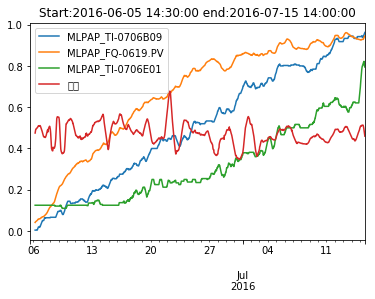

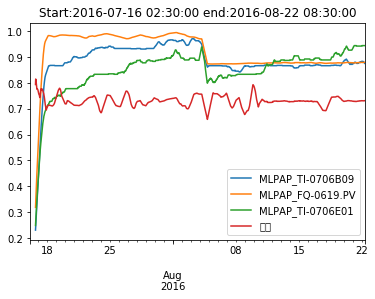

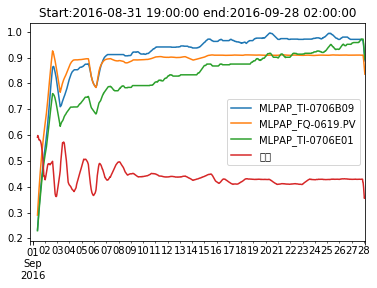

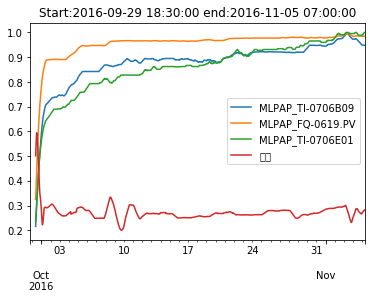

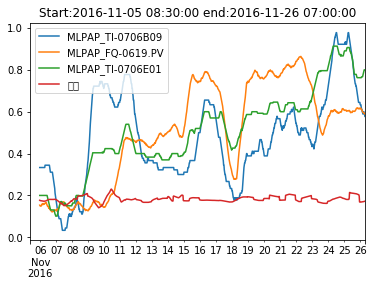

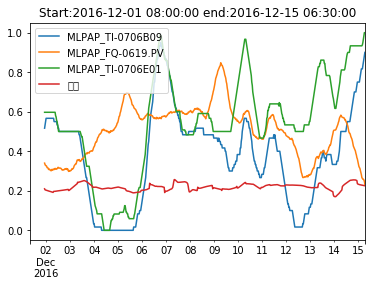

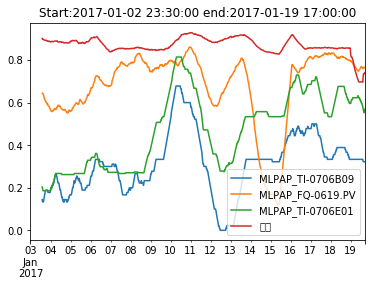

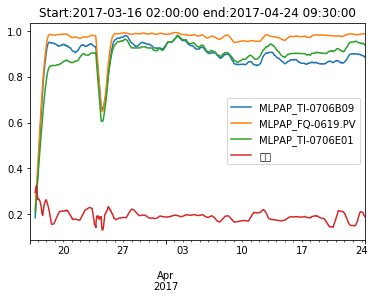

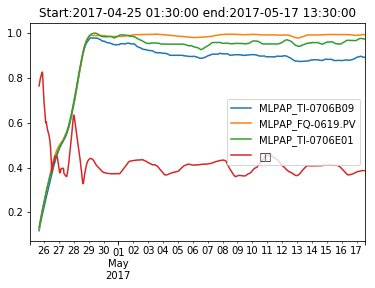

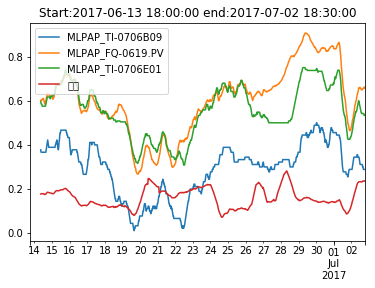

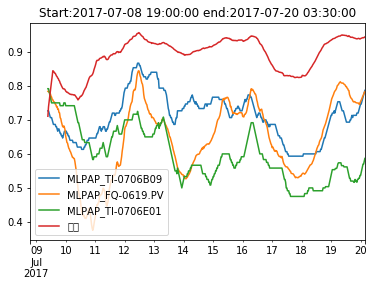

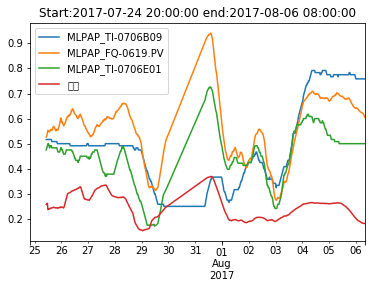

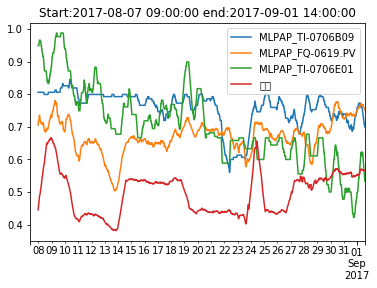

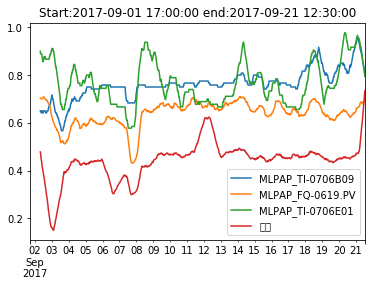

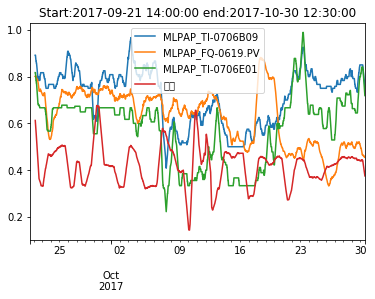

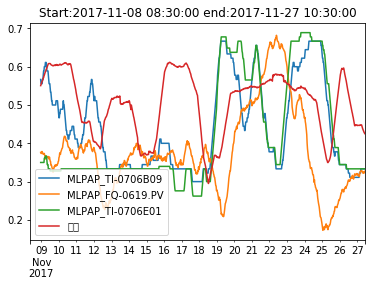

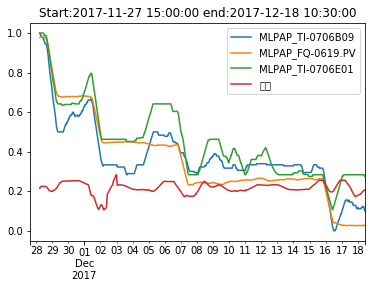

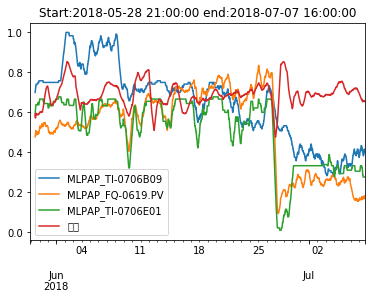

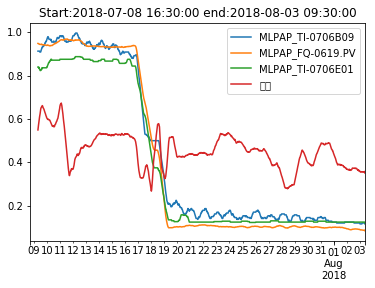

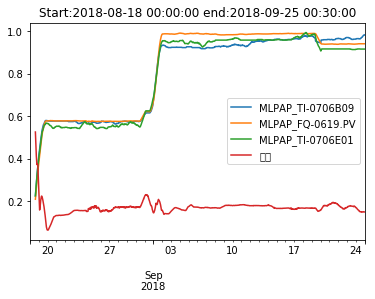

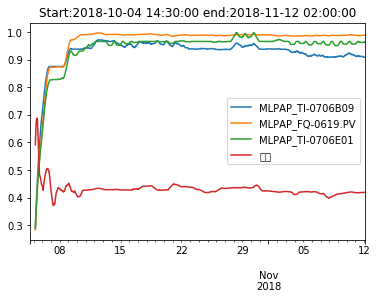

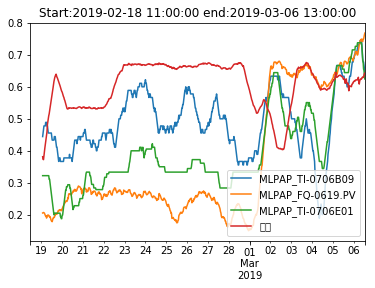

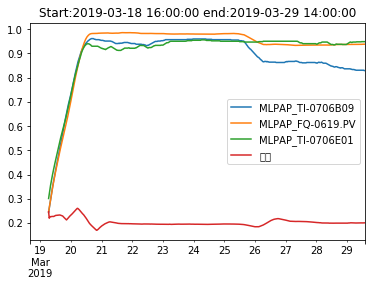

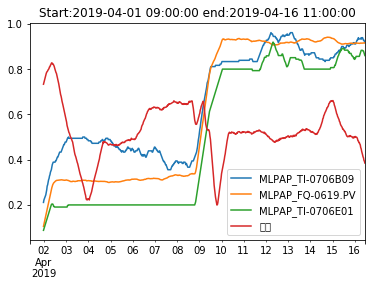

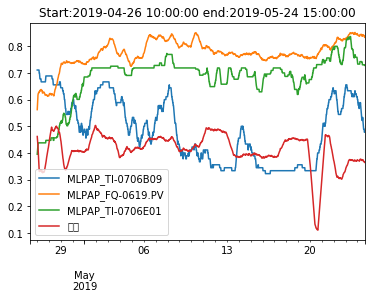

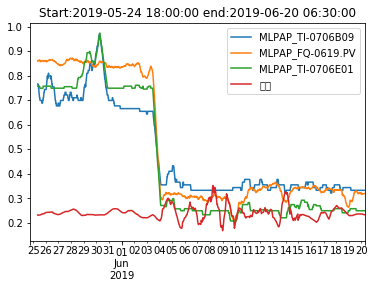

In [72]:
from sklearn.preprocessing import MinMaxScaler
for data in sub_dfs:
  scaler = MinMaxScaler()
  scaler.fit(data)
  data_mm = scaler.transform(data)
  data_mm = pd.DataFrame(data_mm,index=data.index,columns=data.columns)
  data_mm[list(result.index[:3])+['單耗']].rolling(30).mean().plot()
  T = 'Start:{} end:{}'.format(data.index[0],data.index[-1])
  plt.title(T)
  plt.show()

# 看看溫度欄位跟單耗的線圖

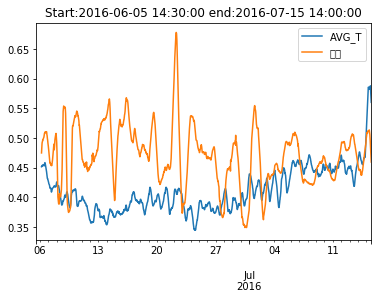

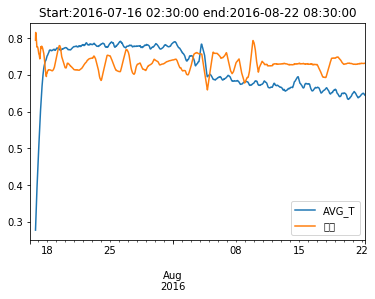

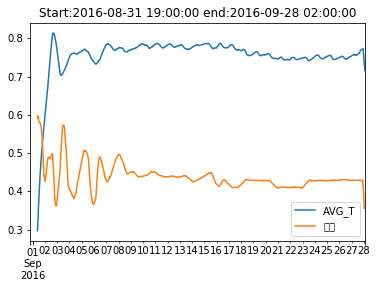

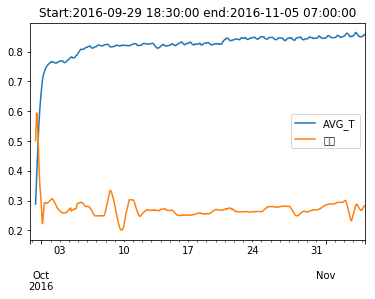

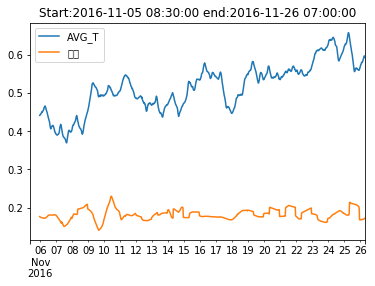

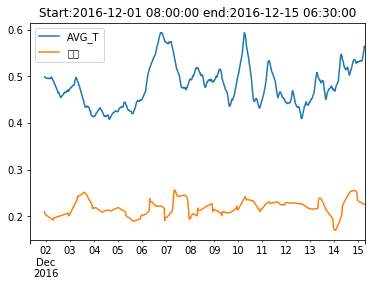

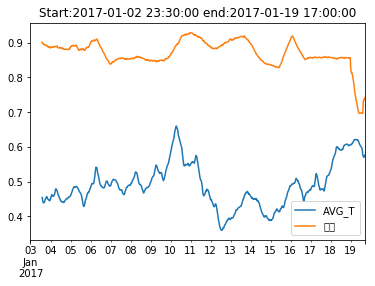

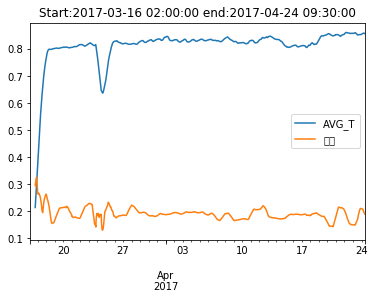

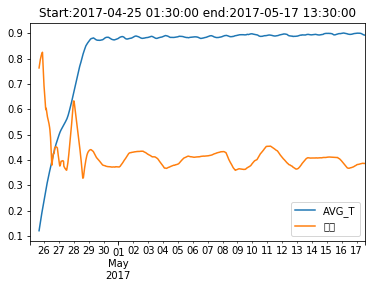

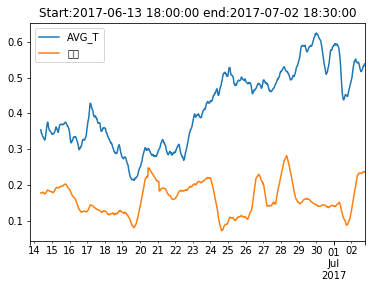

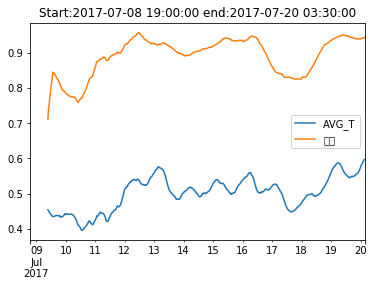

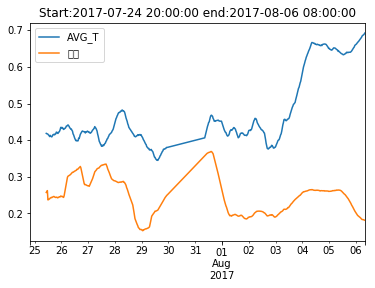

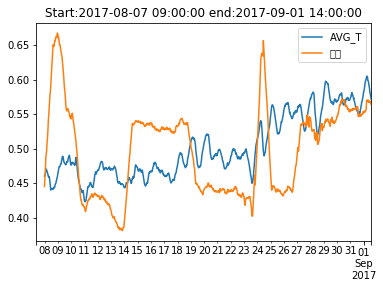

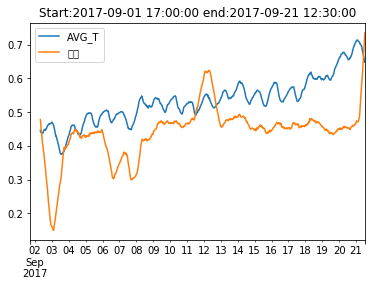

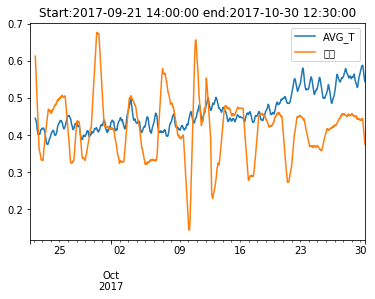

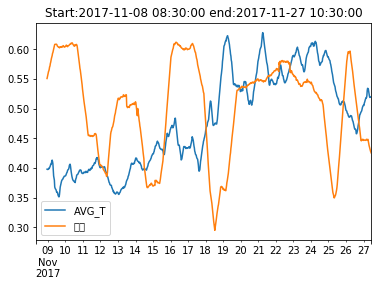

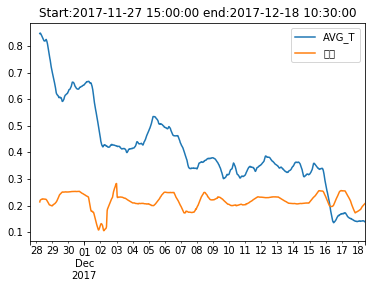

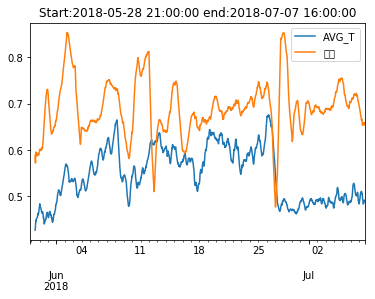

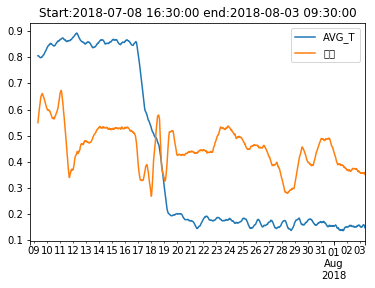

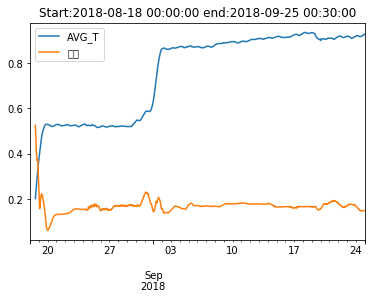

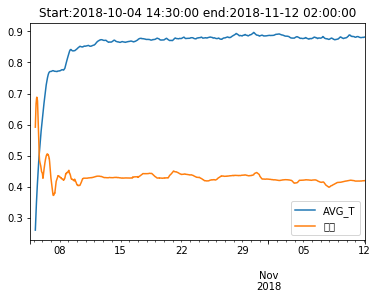

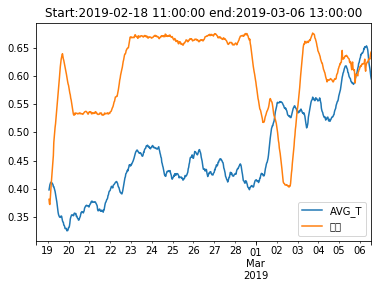

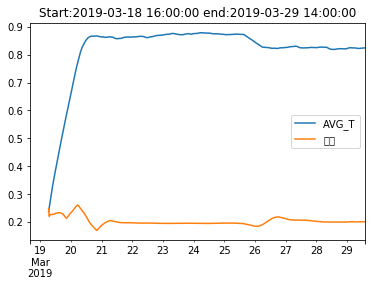

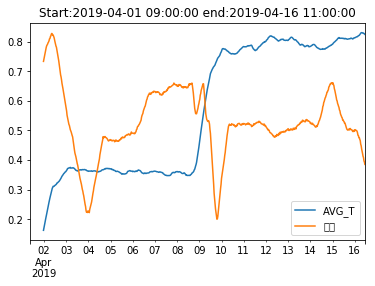

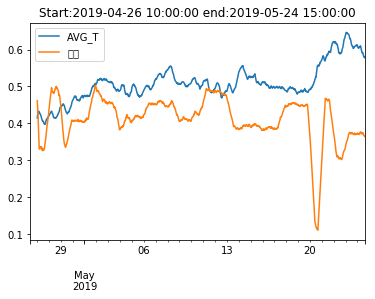

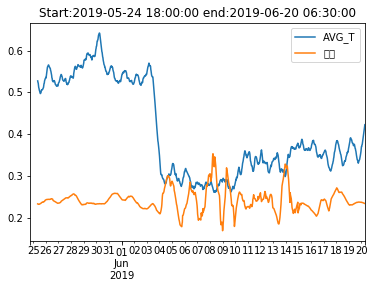

In [73]:
from sklearn.preprocessing import MinMaxScaler
for data in sub_dfs:
  scaler = MinMaxScaler()
  scaler.fit(data)
  data_mm = scaler.transform(data)
  data_mm = pd.DataFrame(data_mm,index=data.index,columns=data.columns)
  data_mm['AVG_T'] = data_mm[溫度欄位].mean(axis=1)
  data_mm[['AVG_T']+['單耗']].rolling(30).mean().plot()
  T = 'Start:{} end:{}'.format(data.index[0],data.index[-1])
  plt.title(T)
  plt.show()